In [6]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
font = {'family' : 'calibri',
        'size'   : 20}
plt.rc('font', **font)

In [2]:
scores = pd.read_csv("scores.csv", usecols = [1, 3, 4]) # we only need the data of years upward scores, and downward scores

In [3]:
c = Counter([ tuple(row)[2:4] for row in scores.itertuples() ]) ## create the matrix for upward scores and downward scores
ladders = c[(3,4)]+c[(2,4)]+c[(1,4)]+c[(0,4)]+c[(2,3)]+c[(1,3)]+c[(0,3)]+c[(1,2)]+c[(0,2)]+c[(0,1)] # number of ladders
snakes = c[(4,3)]+c[(4,2)]+c[(4,1)]+c[(4,0)]+c[(3,2)]+c[(3,1)]+c[(3,0)]+c[(2,1)]+c[(2,0)]+c[(1,0)] # number of snakes

norm_score_TOT = (ladders-snakes)/len(scores) ## normalized score
first_gen_TOT = (c[(0,4)]+c[(0,3)]+c[(0,2)]+c[(0,1)])/ladders ## proportion of first-generation degree holders
stat_preserve_TOT = (len(scores) - ladders - snakes)/len(scores) ## proportion of status preservers

print(norm_score_TOT)
print(first_gen_TOT)
print(stat_preserve_TOT)

-0.3009702329879216
0.5309661436829067
0.5391723318592833


In [4]:
year = 1390
norm_score = {}
first_gen = {}
passers = {}
stat_preserve = {}
while year <1858: # repeat the procedure for every 18 years
    period = scores[scores['year_of_pass'] >= year][scores['year_of_pass'] < year + 18]
    c = Counter([ tuple(row)[2:4] for row in period.itertuples() ])
    ladders = c[(3,4)]+c[(2,4)]+c[(1,4)]+c[(0,4)]+c[(2,3)]+c[(1,3)]+c[(0,3)]+c[(1,2)]+c[(0,2)]+c[(0,1)]
    snakes = c[(4,3)]+c[(4,2)]+c[(4,1)]+c[(4,0)]+c[(3,2)]+c[(3,1)]+c[(3,0)]+c[(2,1)]+c[(2,0)]+c[(1,0)]
    
    norm_score[year] = (ladders-snakes)/len(period)
    first_gen[year] = (c[(0,4)]+c[(0,3)]+c[(0,2)]+c[(0,1)])/(ladders)
    passers[year] = len(period)
    stat_preserve[year] = (len(period) - ladders - snakes)/len(period)
    
    year += 18

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


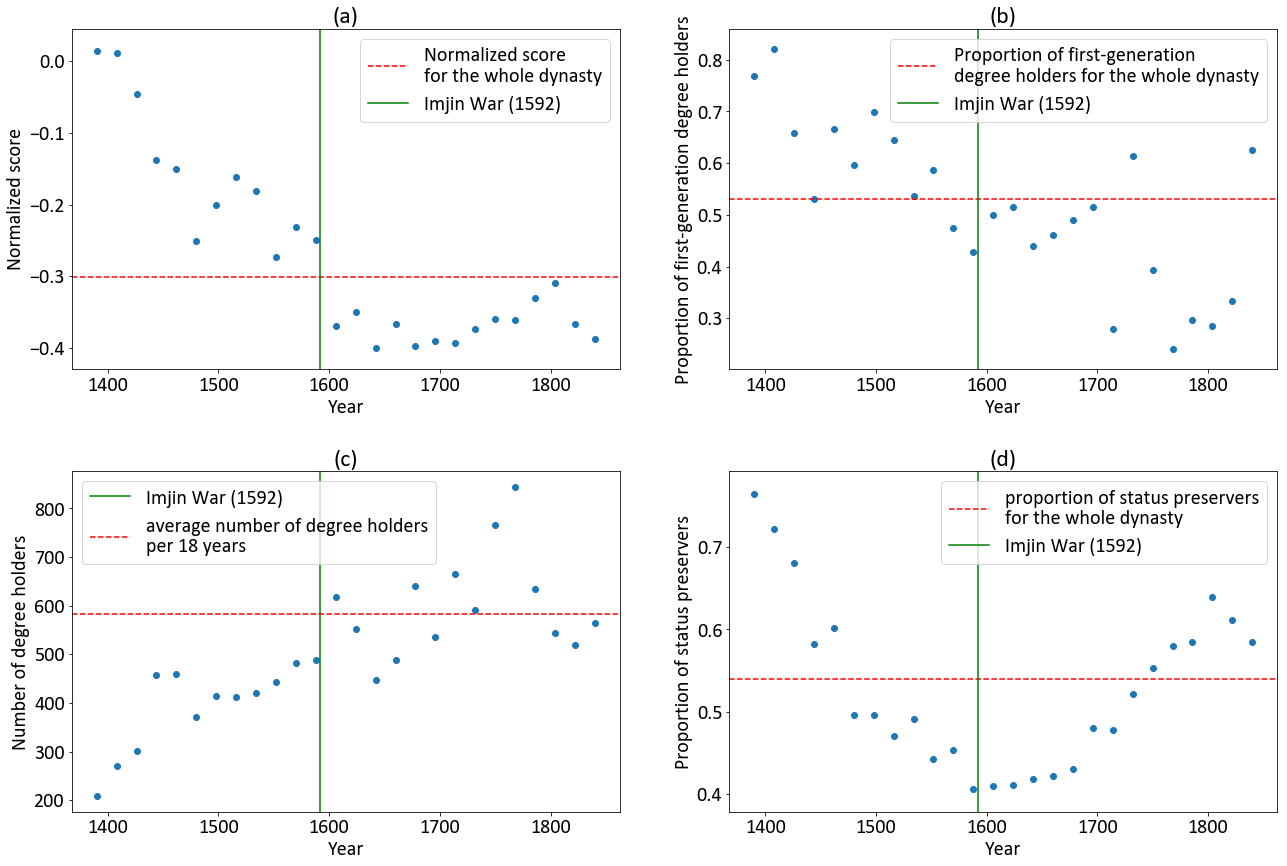

In [7]:
figs, axs = plt.subplots(2, 2)
figs.set_size_inches(21.6, 14.4)
plt.subplots_adjust(hspace = 0.3)

axs[(0, 0)].scatter(norm_score.keys(), norm_score.values())
axs[(0, 0)].axhline(norm_score_TOT, label = "Normalized score\nfor the whole dynasty", c = "red", linestyle = '--')
axs[(0, 0)].axvline(1592, label = "Imjin War (1592)", c = "green")
axs[(0, 0)].set_ylabel("Normalized score")
axs[(0, 0)].set_xlabel("Year")
axs[(0, 0)].legend(loc = 'best')
axs[(0, 0)].set_title("(a)")

axs[(0, 1)].scatter(first_gen.keys(), first_gen.values())
axs[(0, 1)].axhline(first_gen_TOT, label = "Proportion of first-generation\ndegree holders for the whole dynasty", c = "red", linestyle = '--')
axs[(0, 1)].axvline(1592, label = "Imjin War (1592)", c = "green")
axs[(0, 1)].set_ylabel("Proportion of first-generation degree holders")
axs[(0, 1)].set_xlabel("Year")
axs[(0, 1)].legend(loc = 'best')
axs[(0, 1)].set_title("(b)")

axs[(1, 0)].scatter(passers.keys(), passers.values())
axs[(1, 0)].axvline(1592, label = "Imjin War (1592)", c = "green")
axs[(1, 0)].axhline(len(scores)/26, label = "average number of degree holders\nper 18 years", c = "red", linestyle = '--')
axs[(1, 0)].legend(loc = 'best')
axs[(1, 0)].set_xlabel("Year")
axs[(1, 0)].set_ylabel("Number of degree holders")
axs[(1, 0)].set_title("(c)")

axs[(1, 1)].scatter(stat_preserve.keys(), stat_preserve.values())
axs[(1, 1)].axhline(stat_preserve_TOT, label = "proportion of status preservers\nfor the whole dynasty", c = "red", linestyle = '--')
axs[(1, 1)].axvline(1592, label = "Imjin War (1592)", c = "green")
axs[(1, 1)].legend(loc = 'best')
axs[(1, 1)].set_xlabel("Year")
axs[(1, 1)].set_ylabel("Proportion of status preservers")
axs[(1, 1)].set_title("(d)")

plt.show()